In [ ]:
! pip install -q kaggle
from google.colab import files 
files.upload()
#Saving kaggle.json #to kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d salikhussaini49/prediction-of-sepsis

 98% 73.0M/74.7M [00:00<00:00, 149MB/s]
100% 74.7M/74.7M [00:00<00:00, 142MB/s]


In [ ]:
! unzip /content/prediction-of-sepsis.zip 

In [ ]:
# importar las librerias necesarias 

import pandas as pd  # Manipulacion de datos
import numpy as np   # Algebra
import seaborn as sns 
import matplotlib.pyplot as plt # Gaficas

#%matplotlib inline #no he podido entender pa que es:v

In [ ]:
#Se lee el archivo csv y se carga
#Debe hacerse para proceder a la manipulacion de lo datos
#Ubicación del archivo del conjunto de datos ("/content/Dataset.csv") cargado en el Notebook

data = pd.read_csv("Dataset.csv")

In [ ]:
# Por defecto, Python muestra pocas filas y columnas.
# Configure los siguientes parámetros para que todas las filas y columnas sean visibles
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
#Calculo del número de filas y columnas 
data.shape

(1552210, 44)

In [ ]:
#ya que so muchos  datos se hace na inspeccion visual de los primeros
data.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
#teniendo en cuenta que hay daos que no se muestran se verifica el tipo de dato para cada columna 
data.dtypes

Unnamed: 0            int64
Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           

In [ ]:
# El método describe() se usa para calcular algunos datos estadísticos como el percentil,
# la media y el estándar de los valores numéricos de la serie o el marco de datos

data.describe(include="all",datetime_is_numeric=True)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,84145.000000,65028.000000,129365.000000,107573.000000,86301.000000,53561.000000,25183.000000,106568.000000,24941.000000,91331.000000,70466.000000,94616.000000,2990.000000,265516.000000,41446.000000,97951.000000,62301.000000,144525.000000,23141.000000,14781.000000,137433.000000,114591.000000,45699.000000,99447.000000,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,-0.689919,24.075481,0.554839,7.378934,41.021869,92.654188,260.223385,23.915452,102.483661,7.557531,105.827910,1.510699,1.836177,136.932283,2.646666,2.051450,3.544238,4.135528,2.114059,8.290099,30.794093,10.430833,41.231193,11.446405,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,4.294297,4.376504,11.123207,0.074568,9.267242,10.892986,855.746795,19.994317,120.122746,2.433152,5.880462,1.805603,3.694082,51.310728,2.526214,0.397898,1.423286,0.642150,4.311468,24.806235,5.491749,1.968661,26.217669,7.731013,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,0.000000,-50.000000,6.620000,10.000000,23.000000,3.000000,1.000000,7.000000,1.000000,26.000000,0.100000,0.010000,10.000000,0.200000,0.200000,0.200000,1.000000,0.100000,0.010000,5.500000,2.200000,12.500000,0.100000,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,22.000000,0.400000,7.340000,35.000000,94.000000,22.000000,12.000000,54.000000,7.700000,102.000000,0.700000,0.200000,106.000000,1.260000,1.800000,2.600000,3.700000,0.500000,0.040000,27.000000,9.100000,27.800000,7.600000,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,24.000000,0.500000,7.380000,40.000000,97.000000,41.000000,17.000000,74.000000,8.300000,106.000000,0.940000,0.445000,127.000000,1.800000,2.000000,3.300000,4.100000,0.900000,0.300000,30.300000,10.300000,32.400000,10.300000,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,26.800000,0.600000,7.430000,45.000000,98.000000,111.000000,28.000000,108.000000,8.700000,109.000000,1.430000,1.700000,153.000000,3.000000,2.200000,4.100000,4.400000,1.700000,3.980000,34.100000,11.700000,42.800000,13.800000,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,55.000000,4000.000000,7.930000,100.000000,100.000000,9961.000000,268.000000,3833.000000,27.9

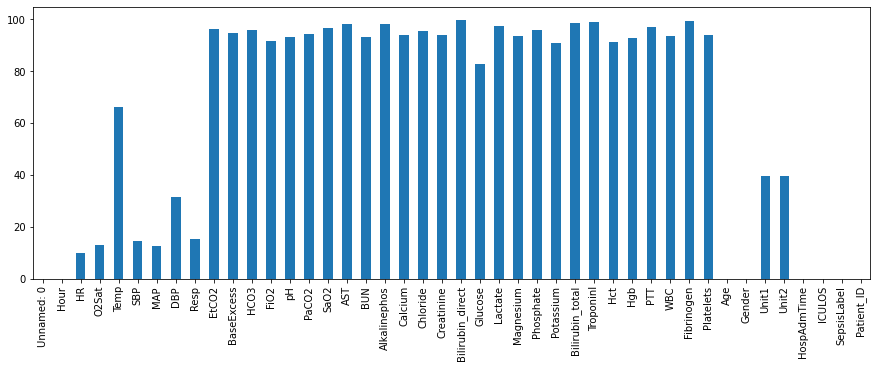

In [ ]:
#Inspeccion visual de los datos en grafica
round(100*(data.isnull().sum()/len(data.index)),2).plot.bar(figsize=(15,5))

Para ajustar los datos ya que se evidencia que no estan completos la mayoria se divide en tres grupos que seran:
-con sepsis (CS)
-Sepsis antes de la admision a UCI(SAU)
-Sepsis despues de la admision a UCI(SDU)
y tenemos valores de referencia para pacintes sin sepsis 


In [ ]:
# obtener la lista de pacientes que tienen sepsis
CS=data['Patient_ID'][data['SepsisLabel']==1].unique()
# Marco de datos para con sepsis 
CS_data=data[data.Patient_ID.isin(CS)]

In [ ]:
# obtener la lista de pacientes que tienen sepsis antes de la admisión a la UCI
SAU=data['Patient_ID'][(data['SepsisLabel']==1) & (data['Hour']==0)]
# construir marco de datos de pacientes que tienen sepsis antes de la admisión a la UCI
SAU_data=data[data.Patient_ID.isin(SAU)]

Con base a la informacion anterior  podemos construir el marco para los pacientes con sepsis despues de la admision a UCI y los pacientes sin sepsis


In [ ]:
# construir marco de datos de pacientes que tienen sepsis después de la admisión a la UCI
SDU=CS_data.merge(SAU_data, how = 'outer',indicator=True).loc[lambda x: x['_merge']=='left_only']


In [ ]:
# construir marco de datos de pacientes que no tienen sepsis
SS_data= data.merge(CS_data, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

Se crea una nueva columna sepsisType donde se agregaran los valores obtenidos anterior mente para cada grupo

In [ ]:
# agregue una nueva columna sepsisType en el marco de datos con valor nulo
data['sepsisType']=np.nan

In [ ]:
#Acontinuacion se actualizara sepsisType para cada uno de los marcos obtenidos 
data.loc[data.Patient_ID.isin(SAU), 'sepsisType'] = 'SAU'
data.loc[data.Patient_ID.isin(CS) & data['sepsisType'].isnull(), 'sepsisType'] = 'SDU'
data.loc[data['sepsisType'].isnull(), 'sepsisType'] = 'SS'


In [ ]:
#validacion de el procedimiento anterior
data['sepsisType'].value_counts()

SS     1379800
SDU     168764
SAU       3646
Name: sepsisType, dtype: int64

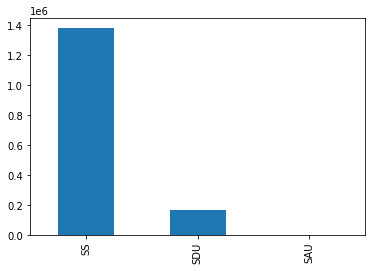

In [ ]:
#Se hacede nuevo la inspeccion visual tanto en grafica como en tabla
data.head()
data['sepsisType'].value_counts().plot.bar()

En la siguiente parte, verificamos el total de pacientes para cada condición 

In [ ]:
len(pd.unique(data['Patient_ID']))

40336

In [ ]:
len(pd.unique(SDU['Patient_ID']))

2506

In [ ]:
len(pd.unique(SS_data['Patient_ID']))

37404

In [ ]:
len(pd.unique(CS_data['Patient_ID']))

2932

In [ ]:
len(pd.unique(SAU_data['Patient_ID']))

426

**CALCULO DEL SIRS**
 
El sirs es el sindrome de respuesta inflamatoria sistemarica, con esto podremos evaluar las condiciones de cada paciente para dar una predicción a su psible respuesta inflamatoria

In [ ]:
condicion=(np.isnan(data['Temp'])& np.isnan(data['HR'])& np.isnan(data['Resp']) &np.isnan(data['WBC']))

In [ ]:
data['hasSIRS'] = np.where(condicion, 1, 0)

In [ ]:
data['hasSIRS'].value_counts()

0    1408039
1     144171
Name: hasSIRS, dtype: int64

Establecemos condiciones para cada variable

In [ ]:
condicion_temp=(data['Temp']>38) |( data['Temp']<36)
condicion_HR=(data['HR']>90)
condicion_Resp=(data['Resp']>20) |( data['PaCO2']<32)
condicion_wbc=(data['WBC']>12000) |( data['WBC']<4000)

In [ ]:
data['SIRS_Score']=np.where(condicion_temp, 1, 0)+np.where(condicion_HR, 1, 0)+np.where(condicion_Resp, 1, 0)+np.where(condicion_wbc, 1, 0)

In [ ]:
data['SIRS_Score'].value_counts()

0    770512
1    532866
2    221739
3     26056
4      1037
Name: SIRS_Score, dtype: int64

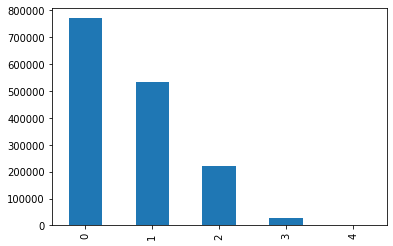

In [ ]:
data['SIRS_Score'].value_counts().plot.bar()

**Analisis y exploracion de los datos obtenidos**




**Grafico de barras**

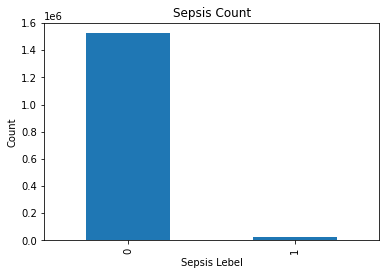

In [ ]:
data.SepsisLabel.value_counts().plot.bar(title="Sepsis Count", xlabel='Sepsis Lebel', ylabel='Count')

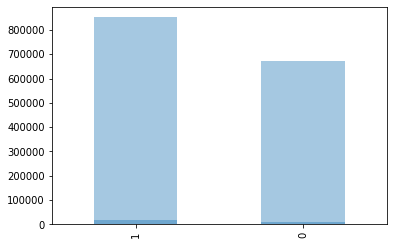

In [ ]:
have_disease = data.loc[data['SepsisLabel']==1, 'Gender'].value_counts().plot.bar(alpha=0.4) 
no_disease = data.loc[data['SepsisLabel']==0, 'Gender'].value_counts().plot.bar(alpha=0.4) 


**Histograma**

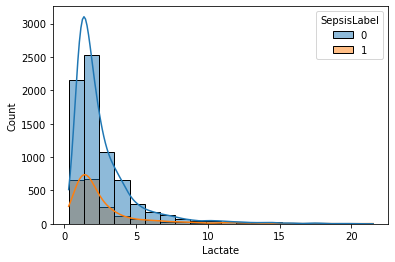

In [ ]:
sns.histplot(data=CS_data, x="Lactato",hue="SepsisLabel", kde=True,bins=20)

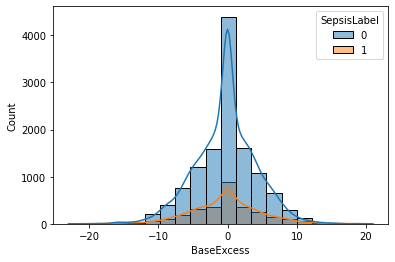

In [ ]:
sns.histplot(data=CS_data, x="BaseExcess",hue="SepsisLabel", kde=True,bins=20)

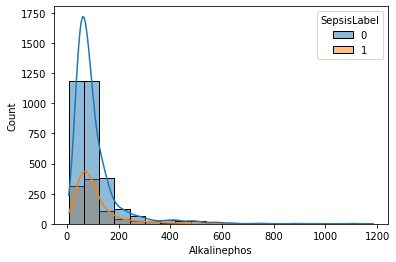

In [ ]:
sns.histplot(data=CS_data, x="Alkalinephos",hue="SepsisLabel", kde=True,bins=20)

**Diagrama de caja**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


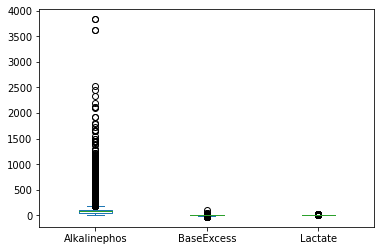

In [ ]:
data[['Alkalinephos','BaseExcess','Lactate']].plot(kind='box')

**Correlación**

(3.5, -0.5)

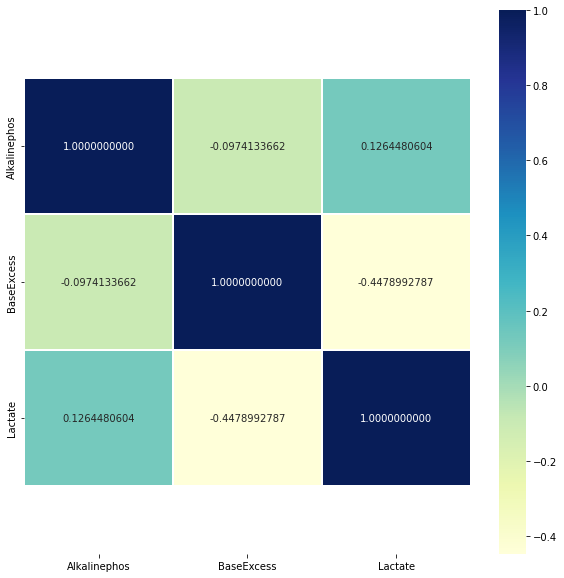

In [ ]:
corr_matrix = data[['Alkalinephos','BaseExcess','Lactate']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
data1=data.loc[:, ['BaseExcess', 'Lactate','Alkalinephos','SepsisLabel']]

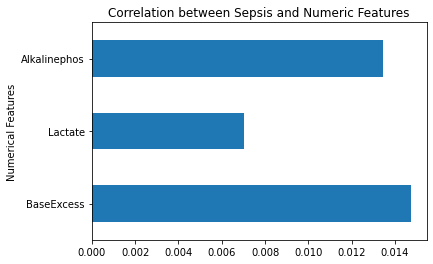

In [ ]:
data1.drop('SepsisLabel', axis=1).corrwith(data1.SepsisLabel).plot.barh(
    title="Correlation between Sepsis and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

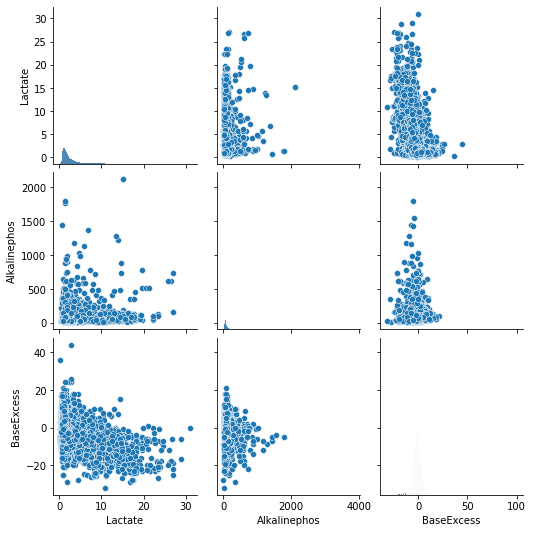

In [ ]:
sns_plot=sns.pairplot(data,vars=['Lactate','Alkalinephos','BaseExcess'])